In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weight-height/weight-height.csv


In [2]:
df = pd.read_csv('/kaggle/input/weight-height/weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.isnull().sum() #No null values

Gender    0
Height    0
Weight    0
dtype: int64

<ipython-input-5-4820c8bca077>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height'>

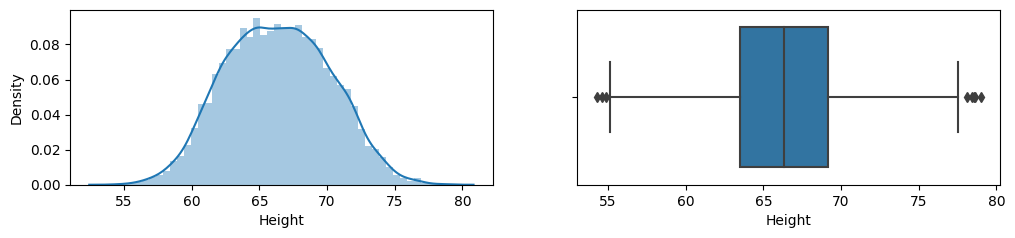

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
plt.subplot(2,2,1)
sns.distplot(df['Height'])
plt.subplot(2,2,2)
sns.boxplot(x= df['Height'])

In [6]:
upper_limit = df['Height'].quantile(0.99)
upper_limit

74.7857900583366

In [7]:
lower_limit = df['Height'].quantile(0.01) #how much you are leaving for upper use the same for lower aswell
lower_limit

58.13441158671655

In [8]:
new_df = df[(df['Height'] <= 74.75) & (df['Height'] >= 58.13)]

new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [9]:
new_df.describe() 

,Height,Weight
count,9797.000000,9797.000000
mean,66.361792,161.381589
std,3.642662,30.920412
min,58.134496,77.523774
25%,63.577118,136.317375
50%,66.317755,161.193433
75%,69.119803,186.737996
max,74.724139,249.946283


In [10]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


<ipython-input-11-26dbcd94f059>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Density'>

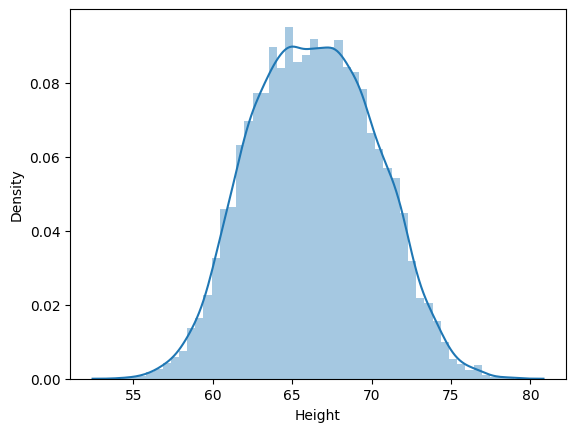

In [11]:
sns.distplot(df['Height'])

<Axes: xlabel='Height'>

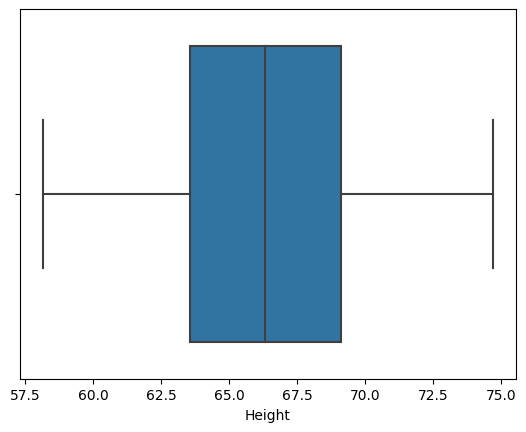

In [12]:
sns.boxplot(x=new_df['Height'])

### Capping - Winsorization

In [13]:
df['Height'] = np.where(df['Height'] > upper_limit, upper_limit, np.where(df['Height'] < lower_limit, lower_limit, df['Height']))

In [14]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

<ipython-input-15-26dbcd94f059>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Density'>

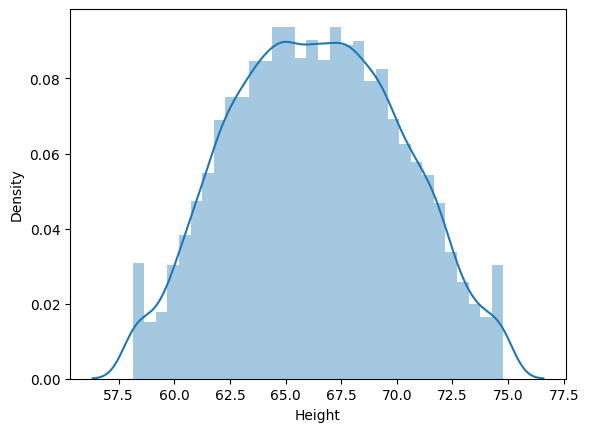

In [15]:
sns.distplot(df['Height'])

<Axes: xlabel='Height'>

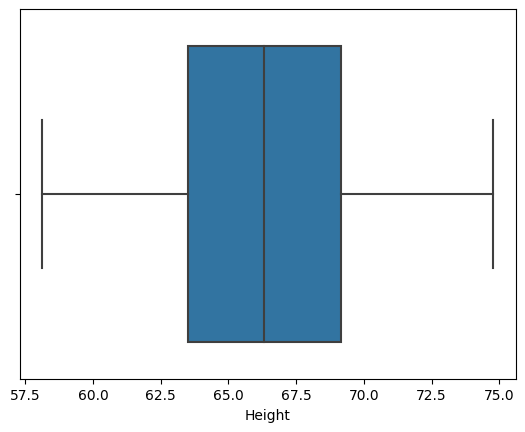

In [16]:
sns.boxplot(x=df['Height'])